In [1]:
import calendar
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import plotly.graph_objs as go
from origami.preprocess import merged_syst_n2ex
from origami.visualise import (
    time_of_day_plot,
    day_of_week_plot,
    month_plot,
    column_compare_plot
)

The following functions loads a joined DataFrame of system price/n2ex price.

In [2]:
dataset = merged_syst_n2ex(
    syst_path='data/systems_prices.csv',
    n2ex_path='data/n2ex_da_2018.csv'
)
dataset = dataset[dataset.datetime < '2019-01-01']
dataset.head()

,datetime,net_imbalance_volume,system_price,n2ex_price
0,2018-01-01 00:30:00,38.5262,55.94000,NaN
1,2018-01-01 01:00:00,167.3802,55.94000,4714.0
2,2018-01-01 01:30:00,109.8918,62.94000,4714.0
3,2018-01-01 02:00:00,-143.3171,31.00000,5460.0
4,2018-01-01 02:30:00,70.7066,60.81578,5460.0


A utility below (in the codebase, `origami.visualise.time_of_day_plot`) for plotting aggregate price behaviour on time of day. On inspection it's apparent that there are peaks in price (possibly due to peaks in demand) around 9am and 7pm. The band around the plot shows the standard deviation in the price (volatility), which is highest around 1pm and 6pm).

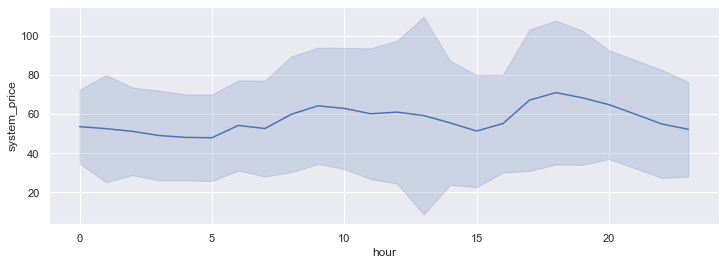

In [14]:
time_of_day_plot(dataset, time_column='datetime', agg_column='system_price')

Another plot showing the mean in system price over the months of the year, and the corresponding standard deviation. The price volatility is highest between Jan-Mar (winter), possibly because of unpredictable pressures on both supply and demand due to weather.

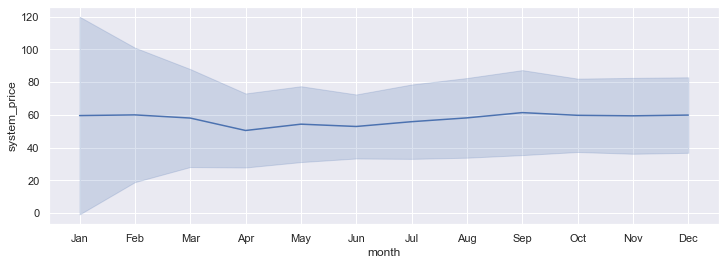

In [15]:
month_plot(dataset, 'datetime', 'system_price')

Here the mean system price for different days of the week, aggregated over 2018. Peak prices on Wednesday and Saturday.

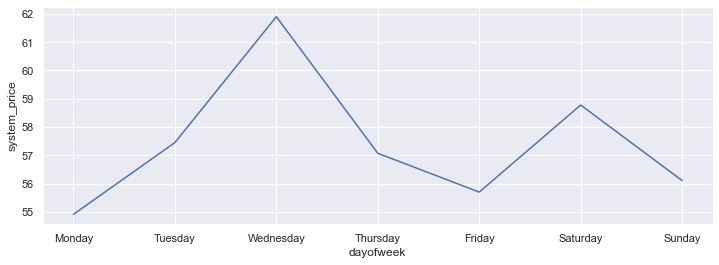

In [7]:
day_of_week_plot(dataset, 'datetime', 'system_price')

A look at system price vs n2ex price shows on inspection some cross-correlation, but the system price is more volatile. Below, the utility aggregates the prices by day with the time_dim parameter, which can also be set to 'M' for a view by month (next cell), where the correlation is apparent.

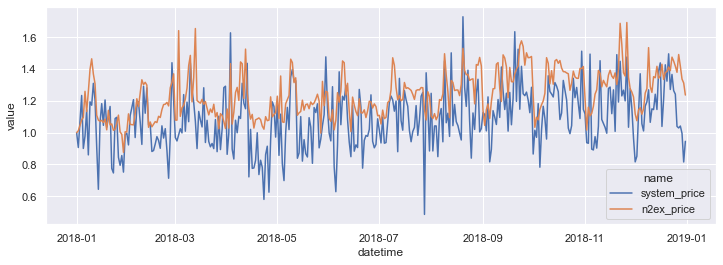

In [23]:
column_compare_plot(dataset, 'datetime', ['system_price', 'n2ex_price'], time_dim='D')

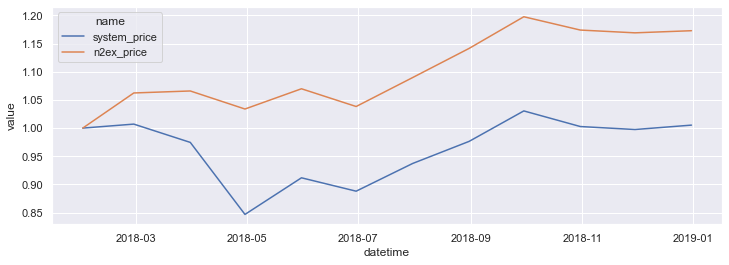

In [24]:
column_compare_plot(dataset, 'datetime', ['system_price', 'n2ex_price'], time_dim='M')

Finally, a comparison of the hour-of-day behaviour of both prices shows similar peaks - with a delay in the n2ex price, which peaks about an hour after the system price.

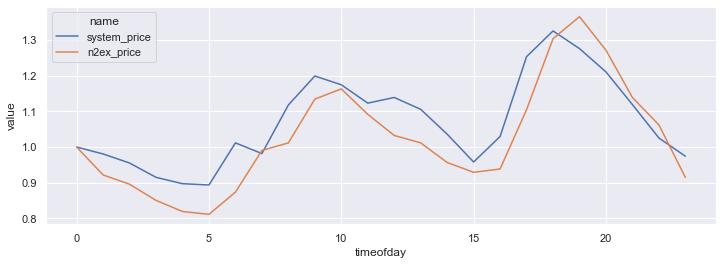

In [25]:
dow_compare = dataset.copy()
dow_compare['timeofday'] = dataset['datetime'].dt.hour
dow_compare = dow_compare.groupby('timeofday').mean().reset_index(drop=False)
column_compare_plot(
    dow_compare,
    group_column='timeofday',
    comparison_columns=['system_price', 'n2ex_price'],
    time_dim=None
)

It's interesting to inspect the degree of correlation between the three columns. Indeed a non-trivial correlation between system/n2ex of 0.38.

In [27]:
dataset[['net_imbalance_volume', 'system_price', 'n2ex_price']].corr()

,net_imbalance_volume,system_price,n2ex_price
net_imbalance_volume,1.000000,0.624490,0.182857
system_price,0.624490,1.000000,0.381368
n2ex_price,0.182857,0.381368,1.000000
